In [2]:
%pylab
%matplotlib ipympl
%run -i C:/Users/3xf/Desktop/VENUS/BOAT/mcstasHelper.py

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from matplotlib.patches import Ellipse
from scipy import linalg

def rebin(a,g=2):
    s = array(shape(a))
    newA = zeros(s//g)
    for i in arange(g):
        for j in arange(g):
            newA+=a[i:s[0]//g*g:g,j:s[1]//g*g:g]
    return newA
    
def ellipseMIN(p,*data):
    x0,y0,a,b = p
    xdata,ydata=data
    x=xdata-x0
    y=ydata-y0
    A = (1-x**2/a/a)*b*b
    s = A-y**2
    s[isnan(s)]=1e10
    return s


Using matplotlib backend: module://ipympl.backend_nbagg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Image Simulation

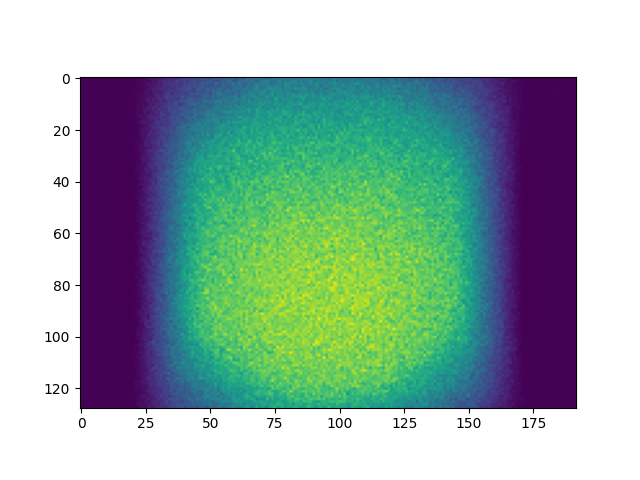

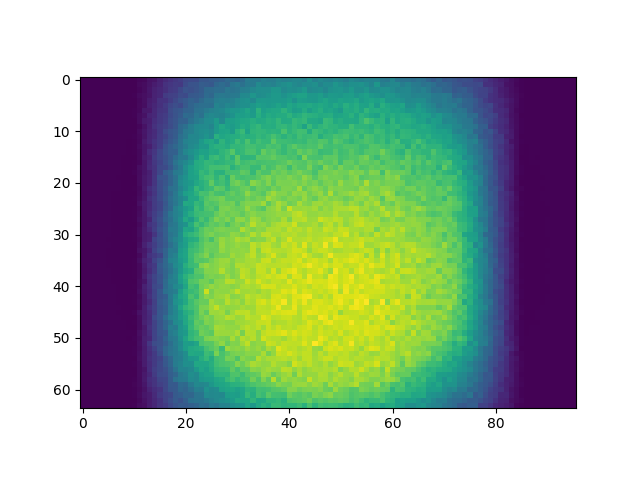

In [2]:
a = ones((20,10))
data = extractMcStasData("Checker8/PSD_output_file.sim")
figure(199)
imshow(data[0])
show()
figure(200)
imshow(rebin(data[0],2))
show()

64 96


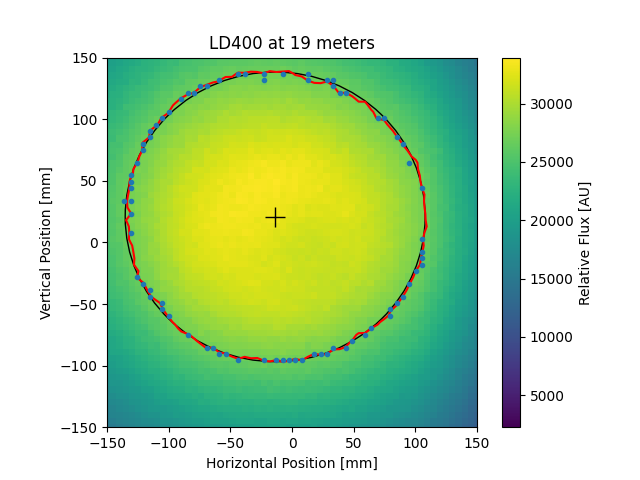

[-13.66903372  20.75754705 121.72642205 117.52588058] [0.0007659  0.00066668 0.00096686 0.00081389]
64 96


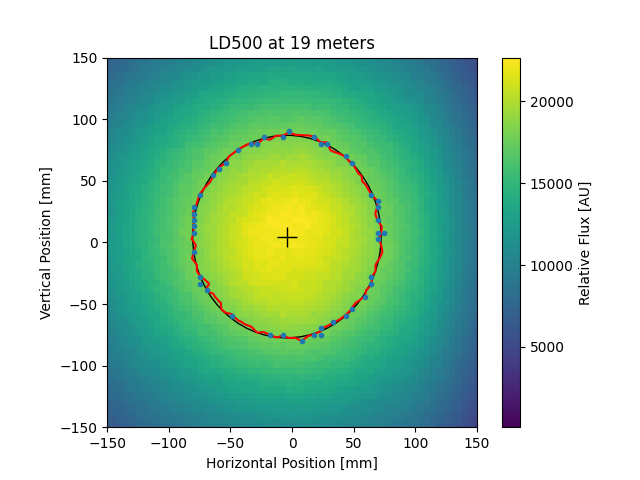

[-4.15794738  4.72669068 76.49690861 82.1988676 ] [0.00118793 0.00134745 0.00139042 0.00160804]
64 96


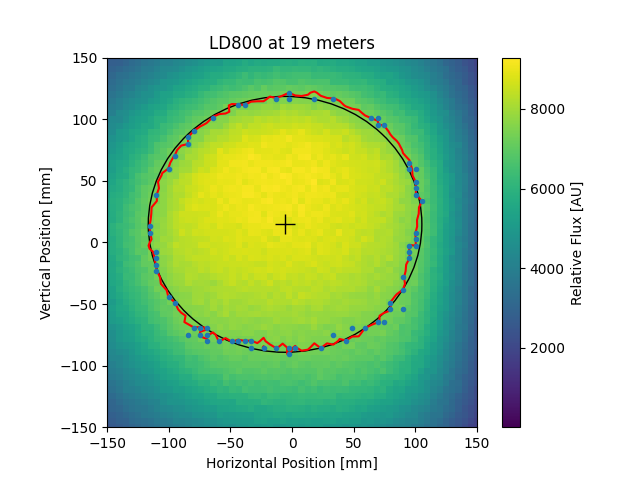

[ -5.62497161  14.65965007 111.03533395 103.84864244] [0.00090953 0.00084683 0.00115698 0.00106229]
64 96


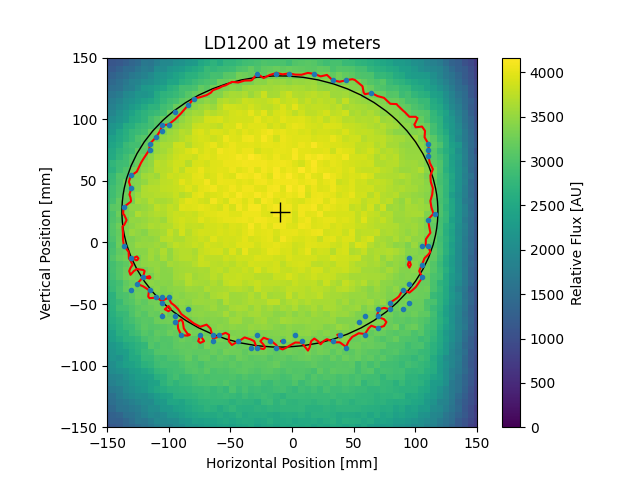

[ -9.82025176  25.07862648 128.24042497 110.05518299] [0.0009276  0.00080083 0.00126205 0.00101887]


In [51]:
LD = [400,500,800,1200]
for r in arange(len(LD)):
    #if LD[r]>1000: binner=5
    #else: binner =2
    binner=1
    data = extractMcStasData("LD%d/PSD_output_file.sim"%LD[r])
    s = data[-1]['type'].split(',')
    #data = data[0]
    data = rebin(data[0],binner)
    ypixels = int(s[1][:-1])//binner
    xpixels = int(s[0][9:])//binner
    print(ypixels,xpixels)
    f, ax = plt.subplots(num=r,clear=True)
    img = ax.imshow(data/10000.0/binner/binner,extent=[-244.236,244.436,162.926,-162.926])
    f.colorbar(img,label="Relative Flux [AU]")
    #contourf(linspace(-244.236,244.436,96),linspace(-162.926,162.926,64),data[0], levels=data[0].max()*arange(0.9,1.0001,0.025))
    #smoothData = scipy.ndimage.gaussian_filter(data[0])
    x,y = linspace(-244.236,244.436,xpixels),linspace(-162.926,162.926,ypixels)
    ax.contour(linspace(-244.236,244.436,xpixels),linspace(-162.926,162.926,ypixels),data,colors='r', levels=[data.max()*0.8])
    ndata =  data/data.max()
    filter = ndata>0.795
    filter*= ndata<0.805
    X,Y = meshgrid(x,y)
    xCont = array(X[filter])
    yCont = array(Y[filter])
    ax.plot(xCont,yCont,'.')
    p0 = [0,35,150,160]
    data = (xCont,yCont)
    res = least_squares(ellipseMIN,p0,args=data)
    U, s, Vh = linalg.svd(res.jac, full_matrices=False)
    tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
    w = s > tol
    cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
    perr = np.sqrt(np.diag(cov))     # 1sigma uncertainty on fitted parameters
    e = Ellipse(res['x'][:2],res['x'][2]*2,res['x'][3]*2,fill=False)
    ax.add_artist(e)
    #plot(xFit,circle(xFit,*p0))
    #plot(xFit,circle(xFit,*p0),'k')
    ax.plot([res['x'][0]],[res['x'][1]],'k+',markersize=15)
    axis([-150,150,-150,150])
    #axis('equal')

    xlabel("Horizontal Position [mm]")
    ylabel("Vertical Position [mm]")
    title("LD%d at 19 meters"%LD[r])
    show()
    print(res.x,perr)